In [1]:
# to show an image automatically within the browser without using show()
%matplotlib inline 

import math
import numpy as np # for working with arrays
import pandas as pd # for working with tables
import scipy.stats as stats
import matplotlib.pyplot as plt # for visualization (creating plots)

import statistics as sts # statistic module for variance

In [2]:
from sklearn.metrics import *
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph

In [3]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [4]:
df = pd.read_csv('Train_newColumns.csv')

In [5]:
#droppo le variabili numeriche 
dfnew = df.drop(columns=['Attrition','JobRole','EducationField','BusinessTravel','Department','EnvironmentSatisfaction','Education' ,'Gender','JobInvolvement','JobSatisfaction','MaritalStatus','OverTime','RelationshipSatisfaction','StockOptionLevel', 'WorkLifeBalance' ])

In [6]:
#MI - ST - YAC
df5 = dfnew.drop(columns=['Age','DistanceFromHome','NumCompaniesWorked','PercentSalaryHike','TrainingTimesLastYear','YearsWithCurrManager','TotalWorkingYears'])

In [7]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   MonthlyIncome   1013 non-null   int64
 1   YearsAtCompany  1013 non-null   int64
 2   Stagnation      1013 non-null   int64
dtypes: int64(3)
memory usage: 23.9 KB


In [8]:
#il MinMaxScaler fa una normalizzazione nel range 0 e 1
scaler = StandardScaler()
#il metodo qui sotto fa un fit e poi trasforma
df_zscore = scaler.fit_transform(df5.values) #x = dataset normalizzato

In [9]:
# il fit parte dal dataset normalizzato X
#eps distanza massima tra due punti
dbscan = DBSCAN(eps=0.22, min_samples=30)
dbscan.fit(df_zscore)

DBSCAN(eps=0.22, min_samples=30)

In [78]:
np.unique(dbscan.labels_, return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5]),
 array([536, 193,  57,  53,  74,  45,  55]))

In [10]:
from scipy.spatial.distance import pdist, squareform

In [80]:
#vettore 
dist = pdist(df_zscore, 'euclidean') #pair wise distance tra tutti i punti, (X)
print (dist)
#trasformiamo il vettore in una matrice
dist = squareform(dist) #distance matrix given the vector dist
print()
print(dist)

[0.72896471 0.42305599 0.41175934 ... 0.63931751 0.73296719 0.22959876]

[[0.         0.72896471 0.42305599 ... 0.88754573 1.32955606 1.27655149]
 [0.72896471 0.         0.78540899 ... 0.30983733 0.94577328 1.01711353]
 [0.42305599 0.78540899 0.         ... 1.03441076 1.57203134 1.54548621]
 ...
 [0.88754573 0.30983733 1.03441076 ... 0.         0.63931751 0.73296719]
 [1.32955606 0.94577328 1.57203134 ... 0.63931751 0.         0.22959876]
 [1.27655149 1.01711353 1.54548621 ... 0.73296719 0.22959876 0.        ]]


In [65]:
k = 6
kth_distances = list()
#selezionamo la distanza dai 5 vicini
for d in dist:
    #selezioniamo la distanza
    index_kth_distance = np.argsort(d)[k]
    kth_distances.append(d[index_kth_distance])

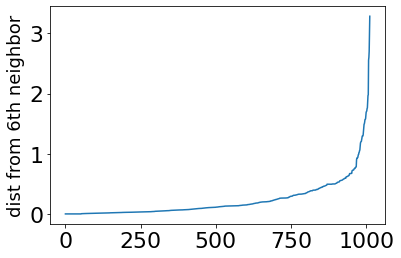

In [66]:
#nel range da 0 alla distanza, distanza sorted
#per il parametro epsilon quando scegliamo 5 esempi scegliamo i valori attorno a 0.22
plt.plot(range(0, len(kth_distances)), sorted(kth_distances))
plt.ylabel('dist from %sth neighbor'% k, fontsize=18)
plt.xlabel('', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=22)
plt.show()

In [47]:
dbscan.labels_[100:200] #se abbiamo -1 = noise

array([-1,  3, -1,  2,  3, -1, 14, -1,  2, -1, 10, 15,  2,  1,  2,  0, -1,
        1,  3,  3,  2,  3, 10,  2,  3, -1, 10, -1,  0,  8,  3,  2,  3,  3,
       -1,  0, -1, 15,  5,  1,  3,  0,  3,  3,  3,  2, -1,  2,  0,  2,  6,
       -1,  3, 15, -1,  2,  6,  3, -1, -1, -1,  1,  5,  1,  3,  3,  3,  2,
       12,  3,  0,  4,  6, 11,  3,  3, -1, 12, -1,  2,  2,  2, 10,  3, 11,
        2, 10,  3,  2,  3, -1,  3,  3,  2,  3,  1,  6, 11, 12, -1])

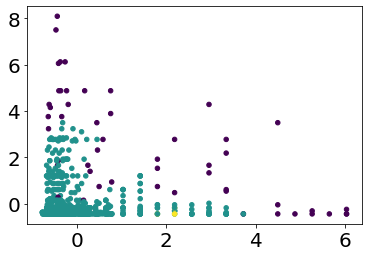

In [68]:
plt.scatter(df_zscore[:,0], df_zscore[:,2], s = 20, c = dbscan.labels_)
plt.tick_params(axis='both', labelsize=20)
plt.show()

In [13]:

print('Silhouette %s' % silhouette_score(df_zscore, dbscan.labels_))

Silhouette 0.0060717292022843955


In [73]:
df['DBscanCluster'] = dbscan.labels_

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1013 entries, 0 to 1012
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1013 non-null   int64 
 1   Attrition                 1013 non-null   int64 
 2   BusinessTravel            1013 non-null   object
 3   Department                1013 non-null   object
 4   DistanceFromHome          1013 non-null   int64 
 5   Education                 1013 non-null   int64 
 6   EducationField            1013 non-null   object
 7   EnvironmentSatisfaction   1013 non-null   int64 
 8   Gender                    1013 non-null   int64 
 9   JobInvolvement            1013 non-null   int64 
 10  JobRole                   1013 non-null   object
 11  JobSatisfaction           1013 non-null   int64 
 12  MaritalStatus             1013 non-null   object
 13  MonthlyIncome             1013 non-null   int64 
 14  NumCompaniesWorked      

In [81]:
c = df.groupby(['DBscanCluster']).mean()

In [82]:
c.to_csv('tabella_con_dbscanCluster.csv', index=False)

In [83]:
df.to_csv('con_col_dbscanCluster.csv', index= False)